### <center>Fatahillah Rahmat Haris Setiawan</center>
#### <center>F1D022044</center>

# Here you can put your extraordinary code

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv    

Mendefinisikan fungsi untuk mengubah citra bgr menjadi citra grayscale

In [14]:
def bgr2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][2] + 0.5870*image[i][j][1] + 0.1140*image[i][j][0])
            
    return grayImg

Membaca citra pada soal kemudian mengubahnya menjadi citra grayscale

In [15]:
image = plt.imread("manchester_united.jpeg")
grayImage = bgr2gray(image)

Mendefinisikan fungsi filter modus untuk melakukan filter dengan nilai modus dari suatu kernel dengan ukuran tertentu, dengan memcari nilai modus pada image asli yang dimana di ambil bagian dengan ukuran kernel (bagian tepi lebih akan di buatkan padding),kemudian dari tiap pixel yang di ambil di check jumlah masing masing dan di ambil nilai index dengan nilai array paling besar dan di ulangin untuk pixel pada pusat setiap kernel

In [16]:
def FilterModus(image, baris, kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image, ((_baris, _baris), (_kolom, _kolom)), mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            Modus = _image[i:i+baris, j:j+kolom]
            index = np.zeros(256)  
            for k in range(Modus.shape[0]):
                for l in range(Modus.shape[1]):
                    index[Modus[k, l]] += 1
            Max = np.max(index)
            for m in range(index.shape[0]):
                if Max == index[m]:
                    _Max = m
            hasil[i, j] = _Max
    return hasil

Mendefinisikan fungsi filter median untuk melakukan filter dengan nilai median dari suatu kernel dengan ukuran tertentu, dengan memcari nilai median pada image asli yang dimana di ambil bagian dengan ukuran kernel (bagian tepi lebih akan di buatkan padding),kemudian dari tiap pixel yang di ambil pada citra asli dengan ukuran kernel di simpan pada array baru satu dimensi dan di urutkan, kemudian di ambil nilai pada index tengah nya, dan proses ini dilakukan untuk setiap pixel dengan ukuran kernelnya

In [17]:
def FilterMedian(image,baris,kolom):
    tengah = int(baris*kolom/2)
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            Median = np.zeros(baris*kolom)
            m=0
            for k in range (i,i+baris):
                for l in range (j,j+kolom):
                    Median[m]=_image[k,l]
                    m+=1
            Median.sort()
            a = Median[tengah]
            b = Median[tengah-1]
            _Median = int(a+b)/2
            hasil[i,j] =_Median
    return hasil

Mendefinisikan fungsi filter mean untuk melakukan filter dengan nilai mean dari suatu kernel dengan ukuran tertentu, dengan memcari nilai mean pada image asli yang dimana di ambil bagian dengan ukuran kernel (bagian tepi lebih akan di buatkan padding),kemudian dari tiap pixel yang di ambil pada citra asli dengan ukuran kernel di jumlahkan dan di bagi dengan jumlah ukuran baris kernel di kali jumlah kolom, dan proses ini dilakukan untuk setiap pixel dengan ukuran kernelnya

In [18]:
def FilterMean(image,baris,kolom):
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range (hasil.shape[0]):
        for j in range (hasil.shape[1]):
            ratarata = np.sum((_image[i:i+baris,j:j+kolom]/(baris*kolom)))
            hasil[i,j] =ratarata
    return hasil

Mendefinisikan fungsi konvolusi, dimulai dengan membuat local variabel untuk citra agar citra asli tidak berubah pada saat vari local di padding, kemudian mencari ukuran padding yang akan di tambahkan ke citra baru untuk padding atas dan kiri dengan mengambil setengah dari kernel (dalam tipe data integer) untuk padding bagian kanan maupun bawah akan berjumlah sisa setengah dari hasil padding untuk kiri dan atas, dan membuat citra yang akan di tampung sebagai hasil dengan ukuran berdasarkan citra sebelum di padding. kemudian mempadding citra berdasarkan perhitungan padding sebelumnya dengan mode 'edge' dan melakukan operasi konvolusi dengan perulangan yang dimana nilai pixel dari pixel hasil adalah penjumalahan masing masing area pixel yang dikalikan dengan kernel

In [19]:
def FilterKonvolusi(image, kernel):
    
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')

    gambar_konvolusi = np.zeros_like(image).astype(np.float32)

    baris, kolom = image.shape

    for i in range(baris):
        for j in range(kolom):

            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return gambar_konvolusi

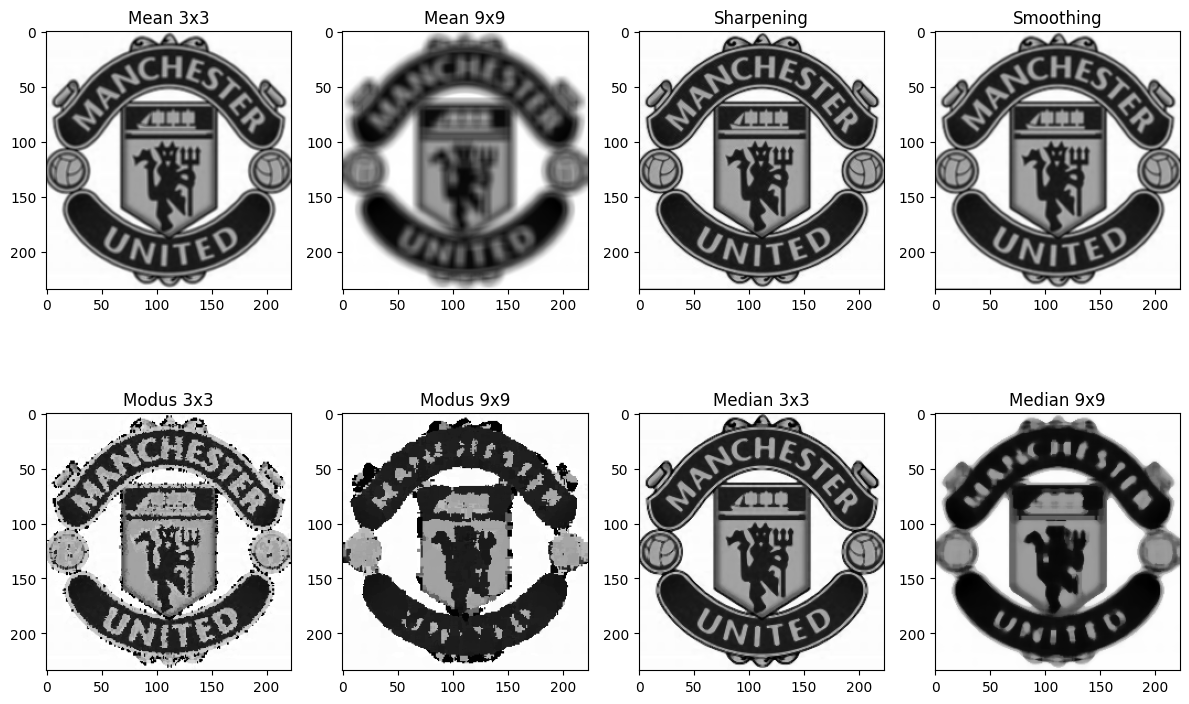

In [20]:
# menampilkan hasil filter mean, modus, median, dan konvolusi dengan kernel sharp dan smooth
Mean1 = FilterMean(grayImage,3,3)
Mean2 = FilterMean(grayImage,9,9)

Modus1 = FilterModus(grayImage,3,3)
Modus2 = FilterModus(grayImage,9,9)

Median1 = FilterMedian(grayImage,3,3)
Median2 = FilterMedian(grayImage,9,9)

kernelSharp = np.array([[1/9,1/9,1/9],
						[1/9,8/9,1/9],
						[1/9,1/9,1/9]])
kernelSmooth = np.array([[1/10,1/10,1/10],
						 [1/10,1/5,1/10],
						 [1/10,1/10,1/10]])

smooth = FilterKonvolusi(grayImage, kernelSmooth) 
sharp = FilterKonvolusi(grayImage, kernelSharp)

plt.figure(figsize=(12, 8))
plt.subplot(2,4,1)
plt.title('Mean 3x3')
plt.imshow(Mean1, cmap="gray")

plt.subplot(2,4,2)
plt.title('Mean 9x9')
plt.imshow(Mean2, cmap="gray")

plt.subplot(2,4,3)
plt.title('Sharpening')
plt.imshow(sharp, cmap="gray")

plt.subplot(2,4,4)
plt.title('Smoothing')
plt.imshow(smooth, cmap="gray")

plt.subplot(2,4,5)
plt.title('Modus 3x3')
plt.imshow(Modus1, cmap="gray")

plt.subplot(2,4,6)
plt.title('Modus 9x9')
plt.imshow(Modus2, cmap="gray")

plt.subplot(2,4,7)
plt.title('Median 3x3')
plt.imshow(Median1, cmap="gray")

plt.subplot(2,4,8)
plt.title('Median 9x9')
plt.imshow(Median2, cmap="gray")

plt.tight_layout()

Mendefinisikan fungsi sobel detection untuk mendeteksi tepi dengan menggunakan operator sobel, dimulai dengan membuat kernel sobel untuk mendeteksi tepi horizontal dan vertikal, kemudian melakukan konvolusi dengan kernel sobel horizontal dan vertikal, kemudian menghitung magnitudo dari kedua hasil konvolusi dengan rumus sqrt(gx^2 + gy^2) kemudian mengembalikan magnitudo

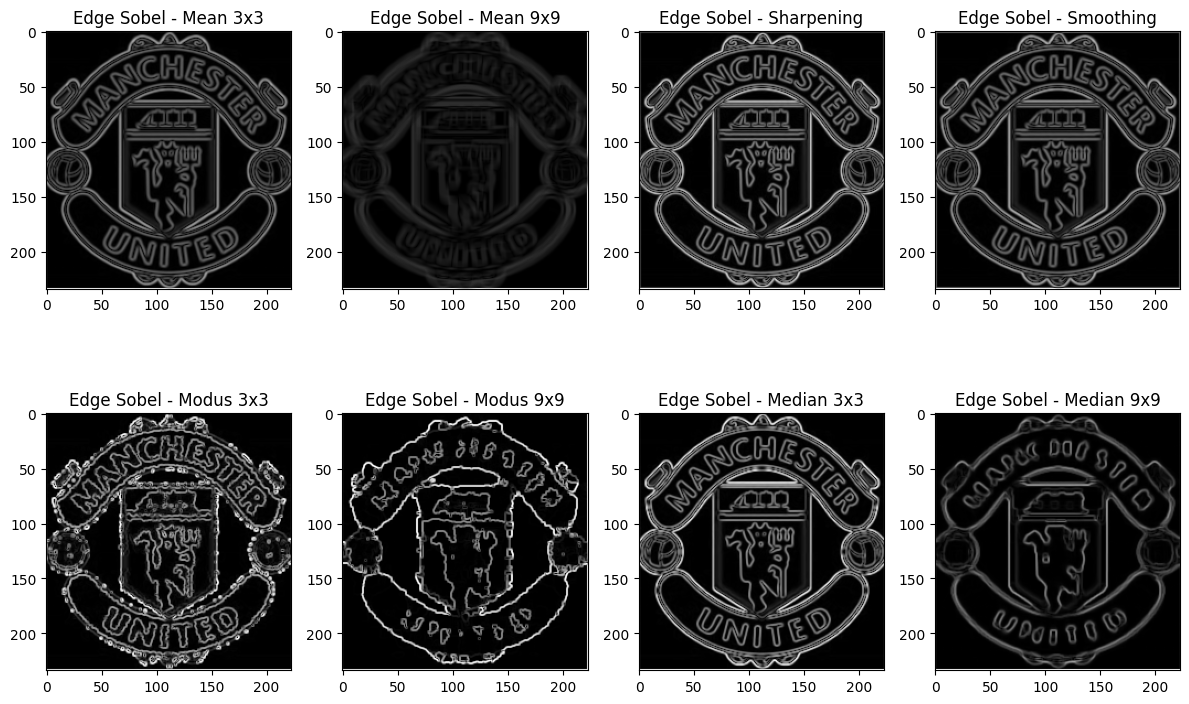

In [21]:
def sobelDetection(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    edge_x = FilterKonvolusi(image, sobel_x)
    edge_y = FilterKonvolusi(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

# Menampilkan hasil deteksi tepi Sobel untuk setiap hasil dari proses sebelumnya
sobelMean1 = sobelDetection(Mean1)
sobelMean2 = sobelDetection(Mean2)
sobelSharp = sobelDetection(sharp)
sobelSmooth = sobelDetection(smooth)
sobelModus1 = sobelDetection(Modus1)
sobelModus2 = sobelDetection(Modus2)
sobelMedian1 = sobelDetection(Median1)
sobelMedian2 = sobelDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge Sobel - Mean 3x3')
plt.imshow(sobelMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge Sobel - Mean 9x9')
plt.imshow(sobelMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge Sobel - Sharpening')
plt.imshow(sobelSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge Sobel - Smoothing')
plt.imshow(sobelSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge Sobel - Modus 3x3')
plt.imshow(sobelModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge Sobel - Modus 9x9')
plt.imshow(sobelModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge Sobel - Median 3x3')
plt.imshow(sobelMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge Sobel - Median 9x9')
plt.imshow(sobelMedian2, cmap="gray")

plt.tight_layout()
plt.show()


Mendefinisikan fungsi prewitt detection untuk mendeteksi tepi dengan menggunakan operator prewitt, dimulai dengan membuat kernel prewitt untuk mendeteksi tepi horizontal dan vertikal, kemudian melakukan konvolusi dengan kernel prewitt horizontal dan vertikal, kemudian menghitung magnitudo dari kedua hasil konvolusi dengan rumus sqrt(gx^2 + gy^2) kemudian mengembalikan magnitudo

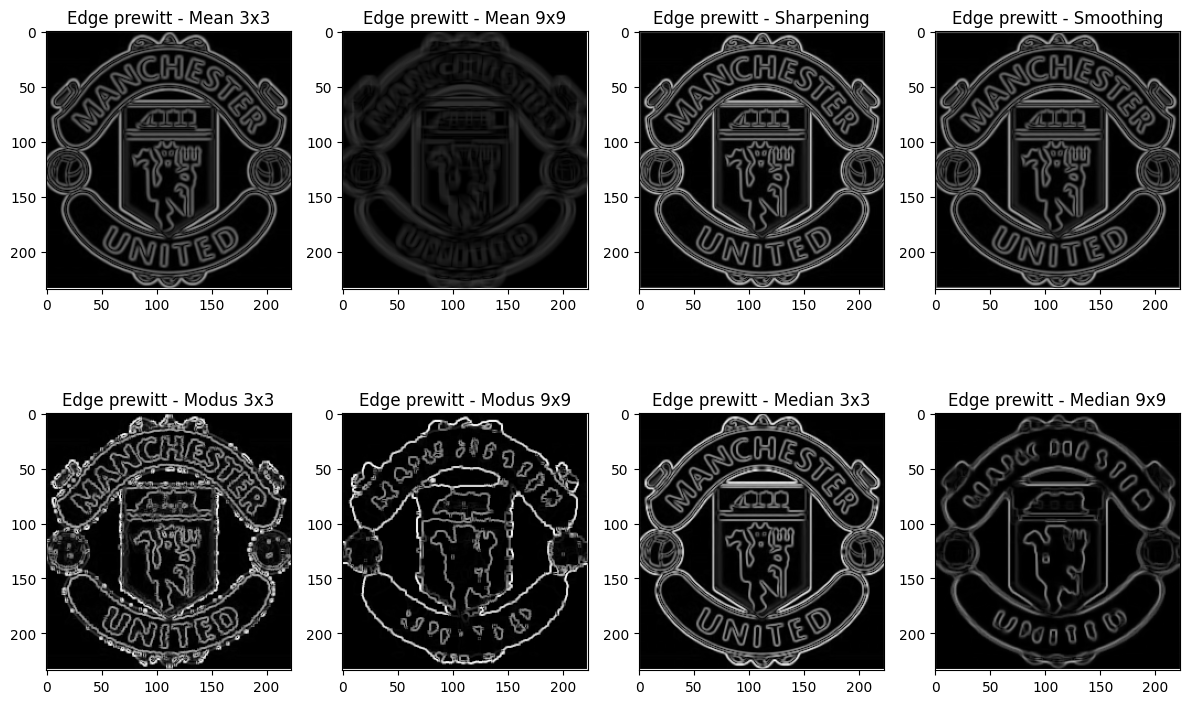

In [22]:
def prewittDetection(image):
    prewitt_x = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

    prewitt_y = np.array([[1, 1, 1],
                        [0, 0, 0],
                        [-1, -1, -1]])

    edge_x = FilterKonvolusi(image, prewitt_x)
    edge_y = FilterKonvolusi(image, prewitt_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

# Menampilkan hasil deteksi tepi prewitt untuk setiap hasil dari proses sebelumnya
prewittMean1 = prewittDetection(Mean1)
prewittMean2 = prewittDetection(Mean2)
prewittSharp = prewittDetection(sharp)
prewittSmooth = prewittDetection(smooth)
prewittModus1 = prewittDetection(Modus1)
prewittModus2 = prewittDetection(Modus2)
prewittMedian1 = prewittDetection(Median1)
prewittMedian2 = prewittDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge prewitt - Mean 3x3')
plt.imshow(prewittMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge prewitt - Mean 9x9')
plt.imshow(prewittMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge prewitt - Sharpening')
plt.imshow(prewittSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge prewitt - Smoothing')
plt.imshow(prewittSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge prewitt - Modus 3x3')
plt.imshow(prewittModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge prewitt - Modus 9x9')
plt.imshow(prewittModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge prewitt - Median 3x3')
plt.imshow(prewittMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge prewitt - Median 9x9')
plt.imshow(prewittMedian2, cmap="gray")

plt.tight_layout()
plt.show()


Mendefinisikan fungsi robert detection untuk mendeteksi tepi dengan menggunakan operator robert, dimulai dengan membuat kernel robert untuk mendeteksi tepi horizontal dan vertikal, kemudian melakukan konvolusi dengan kernel robert horizontal dan vertikal, kemudian menghitung magnitudo dari kedua hasil konvolusi dengan rumus sqrt(gx^2 + gy^2) kemudian mengembalikan magnitudo

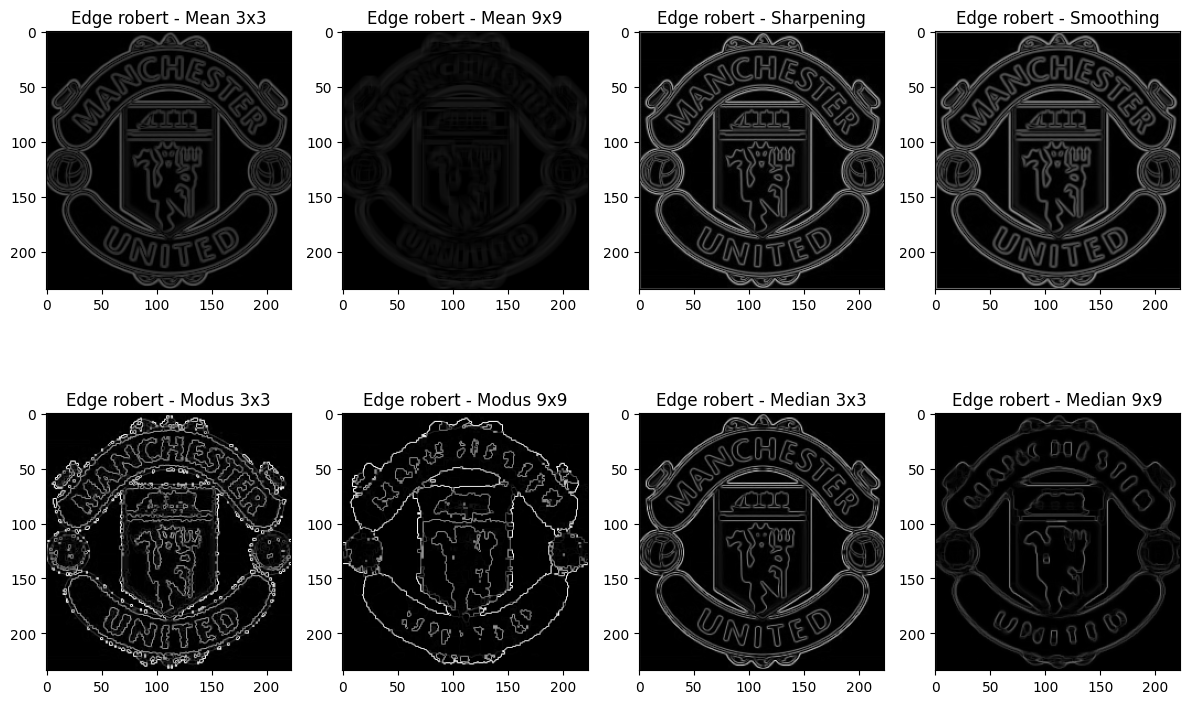

In [23]:
def robertDetection(image):
    robert_x = np.array([[1, 0],
                         [0, -1]])

    robert_y = np.array([[0, 1],
                         [-1, 0]])


    edge_x = FilterKonvolusi(image, robert_x)
    edge_y = FilterKonvolusi(image, robert_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)

    return edge_magnitude

# Menampilkan hasil deteksi tepi robert untuk setiap hasil dari proses sebelumnya
robertMean1 = robertDetection(Mean1)
robertMean2 = robertDetection(Mean2)
robertSharp = robertDetection(sharp)
robertSmooth = robertDetection(smooth)
robertModus1 = robertDetection(Modus1)
robertModus2 = robertDetection(Modus2)
robertMedian1 = robertDetection(Median1)
robertMedian2 = robertDetection(Median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Edge robert - Mean 3x3')
plt.imshow(robertMean1, cmap="gray")

plt.subplot(2, 4, 2)
plt.title('Edge robert - Mean 9x9')
plt.imshow(robertMean2, cmap="gray")

plt.subplot(2, 4, 3)
plt.title('Edge robert - Sharpening')
plt.imshow(robertSharp, cmap="gray")

plt.subplot(2, 4, 4)
plt.title('Edge robert - Smoothing')
plt.imshow(robertSmooth, cmap="gray")

plt.subplot(2, 4, 5)
plt.title('Edge robert - Modus 3x3')
plt.imshow(robertModus1, cmap="gray")

plt.subplot(2, 4, 6)
plt.title('Edge robert - Modus 9x9')
plt.imshow(robertModus2, cmap="gray")

plt.subplot(2, 4, 7)
plt.title('Edge robert - Median 3x3')
plt.imshow(robertMedian1, cmap="gray")

plt.subplot(2, 4, 8)
plt.title('Edge robert - Median 9x9')
plt.imshow(robertMedian2, cmap="gray")

plt.tight_layout()
plt.show()
